In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [438]:
board=[
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,2,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,2,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,2,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,2,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,2,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]
board=np.array(board)

In [346]:
def drawBoard(board):
    for i in range(15):
        for j in range(15):
            plt.plot((0,14),(i,i),'g')
            plt.plot((i,i),(0,14),'g')
            
        for i in range(15):
            for j in range(15):
                if board[i][j]==1:
                    plt.plot(i,j,'ro')
                elif board[i][j]==2:
                    plt.plot(i,j,'ko')
            
    plt.xlim(-0.5,14.5)
    plt.ylim(-0.5,14.5)
    plt.show()

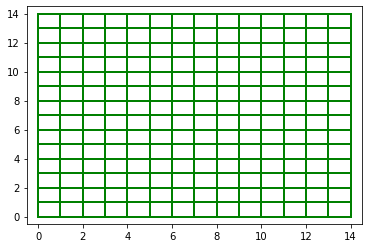

In [347]:
drawBoard(board)

In [349]:
from scipy import signal
convolveBoard=np.ones([3,3])
grad=signal.convolve2d(board,convolveBoard,mode='same',boundary='symm')
grad=(grad>0)^(board>0)

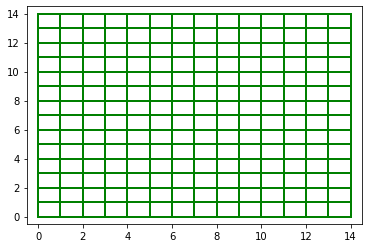

In [354]:
drawBoard(grad)

In [406]:
       
def Range(i,j):
    return (i>=0) & (i<15) & ( j >=0 ) & (j < 15)


def oneScore(board,xpos,ypos,player):
    # 5 500000
    # 4 1000
    # 3 500
    # 2 100
    # 1 10
    award=[0,10,100,500,1000,500000]
    count_direction=[[1,1],[1,0],[1,-1],[0,1]]
    count_container=[]

    for direction in count_direction:
        tempX=xpos
        tempY=ypos
        count = 0
        while Range(xpos,ypos):
            if board[xpos][ypos]==player:
                count+=1
                xpos+=direction[0]
                ypos+=direction[1]
            else:
                xpos=tempX
                ypos=tempY
                count_container.append(count)
                count=0
                break
                    
                    
        while Range(xpos,ypos):
            if board[xpos][ypos]==player:
                count+=1
                xpos+=-direction[0]
                ypos+=-direction[1]
            else:
                xpos=tempX
                ypos=tempY
                count_container.append(count)
                count=0
                break
                
                  

    count_container=np.array(count_container)
    award_container= [ count_container[2*i]+count_container[2*i+1] for i in range(4) ]
        
    award_container=np.array(award_container)-1
    for i in range(len(award_container)):
        if award_container[i]<0:
            award_container[i]=0
            
    award_container=[award[award_container[0]],award[award_container[1]],award[award_container[2]],award[award_container[3]]]
    
    Score=np.sum(award_container)
    
    return Score
        
        

        

In [429]:
oneScore(board,1,1,1)

130

In [430]:
def boardScore(board,player):
    Sum=0
    for i in range(15):
        for j in range(15):
            Sum+=oneScore(board,i,j,player)
    return Sum

In [439]:
def totalScore(board):
    return boardScore(board,1)-boardScore(board,2)
    

In [456]:
def maxmini(board,depth,player):
    if depth==0:
        return totalScore(board),[]
    convolveBoard=np.ones([3,3])
    childBoard=signal.convolve2d(board,convolveBoard,mode='same',boundary='symm')
    childBoard=(childBoard>0)^(board>0)
    tempBoard=np.zeros([15,15])
    childList=[]
    stepList=[]
    
    for i in range(15):
        for j in range(15):
            if board[i][j]==player:
                tempBoard[i][j]=player
                childList.append(tempBoard.copy())
                stepList.append([i,j])
    
    if player == 1:
        bestValue=-1e30
        bestStep=[]
        for i,kidBoard in enumerate(childList):
            val= maxmini(kidBoard,depth-1,2)
            if bestValue<val[0]:
                bestValue=val[0]
                bestStep=stepList[i:i+1]+val[1]
        return bestValue,bestStep
    else:
        bestValue=1e30
        bestStep=[]
        for i,kidBoard in enumerate(childList):
            val= maxmini(kidBoard,depth-1,1)
            if bestValue>val[0]:
                bestValue=val[0]
                bestStep=stepList[i:i+1]+val[1]
        return bestValue,bestStep
        

In [453]:
maxmini(board,1,1)

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0